<a href="https://colab.research.google.com/github/AnjaliMizJ/Data-Science-Project/blob/main/KNN_Cleaned_House_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Read Housing Data

In [3]:

raw_data_df = pd.read_csv('/content/drive/MyDrive/Dataset/filtered_house_data.csv')
raw_data_df

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,format_sold_price,age of house
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.000000,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0,$5300.0k,83
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.000000,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0,$4200.0k,27
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,3716.366828,0.0,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",0,$4200.0k,27
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.000000,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",0,$4500.0k,94
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.000000,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55,$3411.4k,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.000000,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",0,$495.0k,19
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.000000,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43,$550.0k,34
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.000000,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,0,$475.0k,55
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.000000,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",0,$550.0k,15


# Adding another column/feature named Price_per_Sqrft. This column is computed by dividing the Sold_Price by Sqrt_ft

In [4]:
raw_data_df["Price_Per_Sqrft"] = raw_data_df["sold_price"]/raw_data_df["sqrt_ft"]
raw_data_df["Price_Per_Sqrft"]

,Price_Per_Sqrft
0,504.761905
1,575.342466
2,1130.136016
3,498.946668
4,533.372420
...,...
4995,137.461816
4996,237.273512
4997,268.058691
4998,147.690655


In [5]:
raw_data_df["Price_Cat"] = (raw_data_df["Price_Per_Sqrft"] // 50).astype(int)
raw_data_df

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,format_sold_price,age of house,Price_Per_Sqrft,Price_Cat
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.000000,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0,$5300.0k,83,504.761905,10
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.000000,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0,$4200.0k,27,575.342466,11
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,3716.366828,0.0,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",0,$4200.0k,27,1130.136016,22
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.000000,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",0,$4500.0k,94,498.946668,9
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.000000,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55,$3411.4k,29,533.372420,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.000000,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",0,$495.0k,19,137.461816,2
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.000000,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43,$550.0k,34,237.273512,4
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.000000,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,0,$475.0k,55,268.058691,5
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.000000,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",0,$550.0k,15,147.690655,2


In [107]:
raw_data_df["Price_Cat"].unique()

array([10, 11, 22,  9,  3,  5, 14,  6,  7, 19, 16,  8, 17,  4, 18, 15, 12,
        1,  2, 24, 13,  0])

# Prepare the input features

In [6]:
raw_data_df.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA',
       'format_sold_price', 'age of house', 'Price_Per_Sqrft', 'Price_Cat'],
      dtype='object')

In [7]:
raw_data_df.dtypes

,0
MLS,int64
sold_price,float64
zipcode,int64
longitude,float64
latitude,float64
lot_acres,float64
taxes,float64
year_built,int64
bedrooms,int64
bathrooms,float64


# Data is split into Test and Training Data.
# Convert Test Data and Training Data to Numpy

In [8]:
X_train = raw_data_df[["longitude", "latitude"]].to_numpy()
y = raw_data_df["Price_Cat"].to_numpy()

In [9]:
print(X_train.shape)

(5000, 2)


In [10]:
X_train

array([[-110.3782  ,   31.356362],
       [-111.045371,   31.594213],
       [-111.040707,   31.594844],
       ...,
       [-110.755428,   32.964708],
       [-111.055528,   32.296871],
       [-110.913054,   31.385259]])

In [11]:
y

array([10, 11, 22, ...,  5,  2,  2])

In [12]:
#y_train

K Nearest Neighbor using Long/Lat to predict prices Classifier

In [13]:
class KNNClassifier():
  def fit(self, X,y):
    self.X = X
    self.y = y

  def predict(self, X, k, epsilon=1e-3):
    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum(((self.X-X[i])**2), axis=1)
      idxt = np.argsort(dist2)[:k]
      gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon))
      y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()

    return y_hat

In [14]:
def accuracy(y,y_hat):
  return np.mean(y==y_hat)

In [15]:
knn = KNNClassifier()

In [16]:
knn.fit(X_train,y)

In [17]:
y_hat = knn.predict(X_train,2)
accuracy(y,y_hat)

0.995

In [18]:
y_hat

array([10., 11., 22., ...,  5.,  2.,  2.])

(32.2, 32.6)

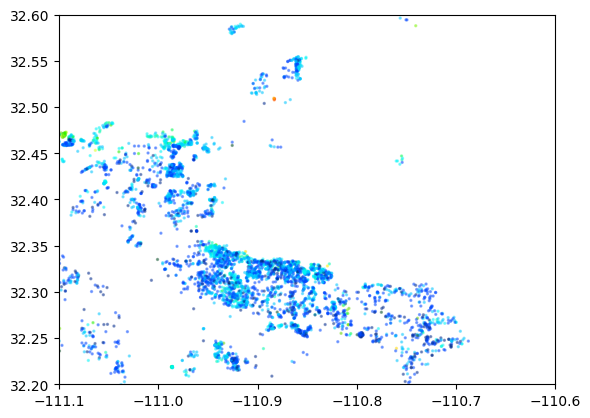

In [19]:
plt.figure()
plt.scatter(X_train[:,0],X_train[:,1], c = y_hat, s=2, alpha = 0.4 , cmap = 'gist_ncar')
plt.xlim(-111.1, -110.6)
plt.ylim(32.2, 32.6)

## Adding Square fit category to Dataframe

In [20]:
#raw_data_df

In [21]:
raw_data_df["rooms"] = raw_data_df["bedrooms"]+raw_data_df["bathrooms"]
data= raw_data_df[['sold_price','lot_acres', 'latitude' , 'longitude', 'sqrt_ft','year_built', 'rooms' ,'Price_Cat']].copy()
data

,sold_price,lot_acres,latitude,longitude,sqrt_ft,year_built,rooms,Price_Cat
0,5300000.0,2154.00,31.356362,-110.378200,10500.000000,1941,23.0,10
1,4200000.0,1707.00,31.594213,-111.045371,7300.000000,1997,4.0,11
2,4200000.0,1707.00,31.594844,-111.040707,3716.366828,1997,5.0,22
3,4500000.0,636.67,31.645878,-111.035925,9019.000000,1930,12.0,9
4,3411450.0,3.21,32.285162,-110.813768,6396.000000,1995,10.0,10
...,...,...,...,...,...,...,...,...
4995,495000.0,4.98,31.907917,-110.661829,3601.000000,2005,8.0,2
4996,550000.0,1.42,32.316373,-110.858556,2318.000000,1990,7.0,4
4997,475000.0,12.06,32.964708,-110.755428,1772.000000,1969,5.0,5
4998,550000.0,1.01,32.296871,-111.055528,3724.000000,2009,8.0,2


In [22]:
data= data.dropna()

In [23]:
data.isnull().sum()

,0
sold_price,0
lot_acres,0
latitude,0
longitude,0
sqrt_ft,0
year_built,0
rooms,0
Price_Cat,0


In [24]:
X = data.to_numpy()
y = X[:,0]
X = X[:,4]

In [25]:
y.shape

(4994,)

In [26]:
X.shape

(4994,)

# KNN Regressor

In [27]:

# Set test size
test_size = 0.2

# Randomly sample the set
test_df = data.sample(frac=test_size, random_state = 42)
test_df

,sold_price,lot_acres,latitude,longitude,sqrt_ft,year_built,rooms,Price_Cat
84,1825000.0,1.02,32.342472,-110.919685,7451.0,1995,12.0,4
1144,897000.0,0.65,32.409754,-110.984823,3115.0,2018,7.0,5
2951,640000.0,0.83,32.403329,-110.990696,2804.0,1996,6.0,4
653,1025000.0,0.77,32.333325,-110.890347,3962.0,1990,6.0,5
2291,725000.0,0.60,32.216851,-110.921890,2594.0,1967,8.0,5
...,...,...,...,...,...,...,...,...
2655,620000.0,35.10,32.504862,-110.872012,2825.0,1994,5.0,4
2964,640000.0,0.63,32.248151,-110.729880,3930.0,1999,9.0,3
1777,769000.0,1.28,32.198959,-111.036902,3330.0,2015,8.0,4
1736,775000.0,76.92,31.591976,-110.911751,4800.0,2000,7.0,3


In [28]:
#Drop the rows of the train_df from df_House dataframe using their indexes to create a test Data with what is left
train_df = data.drop(test_df.index)
train_df

,sold_price,lot_acres,latitude,longitude,sqrt_ft,year_built,rooms,Price_Cat
0,5300000.0,2154.00,31.356362,-110.378200,10500.000000,1941,23.0,10
1,4200000.0,1707.00,31.594213,-111.045371,7300.000000,1997,4.0,11
2,4200000.0,1707.00,31.594844,-111.040707,3716.366828,1997,5.0,22
3,4500000.0,636.67,31.645878,-111.035925,9019.000000,1930,12.0,9
4,3411450.0,3.21,32.285162,-110.813768,6396.000000,1995,10.0,10
...,...,...,...,...,...,...,...,...
4994,535000.0,0.18,32.317496,-110.922291,2106.000000,2002,5.0,5
4995,495000.0,4.98,31.907917,-110.661829,3601.000000,2005,8.0,2
4997,475000.0,12.06,32.964708,-110.755428,1772.000000,1969,5.0,5
4998,550000.0,1.01,32.296871,-111.055528,3724.000000,2009,8.0,2


In [29]:
y_train = train_df["sold_price"].to_numpy()
y_test = test_df["sold_price"].to_numpy()
y_train

array([5300000., 4200000., 4200000., ...,  475000.,  550000.,  450000.])

In [30]:
X_train = train_df[['lot_acres', 'latitude' , 'longitude', 'sqrt_ft','year_built', 'rooms' ,'Price_Cat']].to_numpy()
X_test = test_df[['lot_acres', 'latitude' , 'longitude', 'sqrt_ft','year_built', 'rooms' ,'Price_Cat']].to_numpy()
X_train

array([[ 2.15400000e+03,  3.13563620e+01, -1.10378200e+02, ...,
         1.94100000e+03,  2.30000000e+01,  1.00000000e+01],
       [ 1.70700000e+03,  3.15942130e+01, -1.11045371e+02, ...,
         1.99700000e+03,  4.00000000e+00,  1.10000000e+01],
       [ 1.70700000e+03,  3.15948440e+01, -1.11040707e+02, ...,
         1.99700000e+03,  5.00000000e+00,  2.20000000e+01],
       ...,
       [ 1.20600000e+01,  3.29647080e+01, -1.10755428e+02, ...,
         1.96900000e+03,  5.00000000e+00,  5.00000000e+00],
       [ 1.01000000e+00,  3.22968710e+01, -1.11055528e+02, ...,
         2.00900000e+03,  8.00000000e+00,  2.00000000e+00],
       [ 4.16000000e+00,  3.13852590e+01, -1.10913054e+02, ...,
         1.98800000e+03,  8.00000000e+00,  2.00000000e+00]])

In [31]:
class KNNRegressor():

  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X, K, epsilon=1e-3):

    N=len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = np.exp(-dist2[idxt])/(np.exp(-dist2[idxt]).sum()+epsilon)
      y_hat[i] = gamma_k.dot(self.y[idxt])

    return y_hat

In [32]:
knnr = KNNRegressor()
knnr.fit(X_train, y_train)

In [33]:
y_hat_train1 = knnr.predict(X_train,8)
y_hat_train2 = knnr.predict(X_train,3)
y_hat_train3 = knnr.predict(X_train,2)

In [34]:
y_test_hat = knnr.predict(X_test,6)

In [35]:
np.mean(y_train==y_hat_train1)

0.0

In [36]:

np.mean(y_test==y_test_hat)

0.0

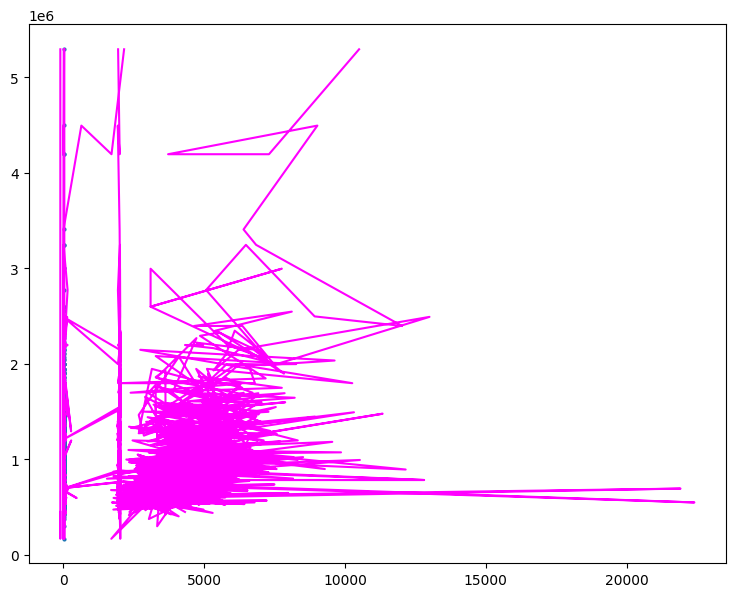

In [37]:
plt.figure(figsize=(9,7))
plt.scatter(X_train[:,1],y_train, s=4)
plt.plot(X_train, y_hat_train1, color="#FF00FF")
#plt.plot(X_train, y_hat_train2, color="#7000FF")
#plt.plot(X_train, y_hat_train3, color="#00FF00")

# Multivariate Models

In [38]:
from scipy.stats import multivariate_normal as mvn

In [68]:
X=data[['sold_price','lot_acres', 'latitude','longitude','sqrt_ft','year_built' ,'rooms' ,'Price_Cat']]
X.describe()

,sold_price,lot_acres,latitude,longitude,sqrt_ft,year_built,rooms,Price_Cat
count,4.994000e+03,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000
mean,7.748700e+05,4.664422,32.309120,-110.912005,3716.366828,1992.313176,7.765018,3.753504
std,3.186641e+05,51.664424,0.177249,0.120662,1115.058123,65.523989,2.418510,1.385280
min,1.690000e+05,0.000000,31.356362,-112.520168,1100.000000,0.000000,2.000000,0.000000
25%,5.850000e+05,0.580000,32.277824,-110.979215,3051.000000,1987.000000,7.000000,3.000000
50%,6.750000e+05,0.990000,32.318568,-110.923316,3524.000000,1999.000000,7.000000,4.000000
75%,8.357500e+05,1.770000,32.394498,-110.859043,4120.750000,2006.000000,9.000000,4.000000
max,5.300000e+06,2154.000000,34.927884,-109.454637,22408.000000,2019.000000,71.000000,24.000000


In [69]:

X.isnull().sum()

,0
sold_price,0
lot_acres,0
latitude,0
longitude,0
sqrt_ft,0
year_built,0
rooms,0
Price_Cat,0


In [70]:
X = X.dropna()

In [71]:
X=X.to_numpy()

In [72]:
y=X[:,0]
X=X[:,1:]

In [73]:
y

array([5300000., 4200000., 4200000., ...,  475000.,  550000.,  450000.])

In [74]:
X.shape

(4994, 7)

# Helpful Functions

In [75]:
def MAE(Y,Y_hat):
  return np.sum(np.abs((Y-Y_hat)/Y))

def R2(Y,Y_hat):
  N= len(Y)
  return 1-((np.sum((Y-Y_hat)**2)/np.sum((Y_hat-np.mean(Y))**2)))

def OLS(Y, Y_hat, N):
  return ((1/(2*N))*np.sum((Y-Y_hat)**2))

## OLS Multivariate(mv) Linear Regression Class

In [76]:
class MVLinearRegression():

  def fit(self, X, y, eta= 1e-3, epochs=1e3, show_curve=False):
    epochs = int(epochs)
    N, D = X.shape
    Y=y

    #Begin Optimization
    self.W = np.random.randn(D)
    self.J = np.zeros(epochs)

    #Stochastic Gradient Descent
    for epoch in range(epochs):
      Y_hat = self.predict(X)
      self.J[epoch] = OLS(Y, Y_hat, N)
      #Weight Update Rule
      self.W -= eta*(1/N)*(X.T@(Y_hat-Y))

    if show_curve:
      plt.figure()
      plt.plot(self.J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def predict(self, X):
    return X@self.W

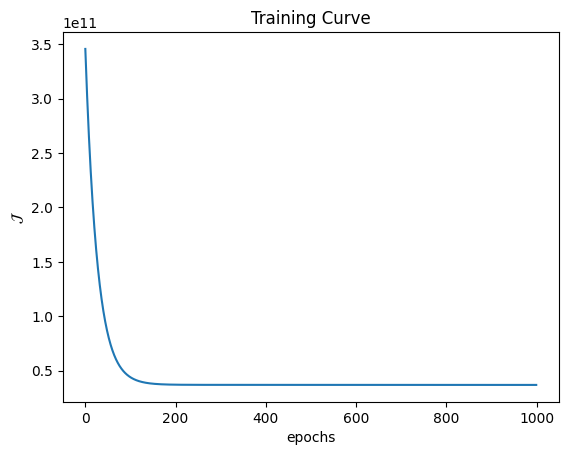

In [94]:
my_reg = MVLinearRegression()
my_reg.fit(X,y, eta=1e-9, epochs=1e3, show_curve=True)

In [96]:
y_hat_test = my_reg.predict(X_test)

In [97]:
3# Assign Test values (Square Feet,Lot_acres, Rooms, Knn_Weight)
Xtest = np.array([[ 1.00000000e+00,3.23253240e+01, -1.10881391e+02,  3.49500000e+03,
        1.96600000e+03,  8.00000000e+00,  3.00000000e+00],[3.30000000e+00,3.24449060e+01, -1.11044736e+02,  6.49600000e+03,
        2.00800000e+03,  9.00000000e+00,  5.00000000e+00]])
#'sold_price','lot_acres', 'latitude' , 'longitude', 'sqrt_ft','year_built', 'rooms' ,'Price_Cat'

In [98]:
X_test[1]

array([ 6.50000000e-01,  3.24097540e+01, -1.10984823e+02,  3.11500000e+03,
        2.01800000e+03,  7.00000000e+00,  5.00000000e+00])

In [99]:
# Predict price
my_reg.predict(Xtest)

array([ 734206.02673883, 1219791.28243624])

In [100]:
R2(y_test,y_hat_test)

-1.7573460604519413

In [101]:
MAE(y_test,y_hat_test)

193.83085647977055

In [102]:
OLS(y_test,y_hat_test,2)

17324429677537.078

## INPUT FUNCTION

In [108]:
def input_func():
  ##'sold_price','lot_acres', 'latitude' , 'longitude', 'sqrt_ft','year_built', 'rooms' ,'Price_Cat'
  # For integer input
  lot_acres = float(input("Enter lot_acres"))
  print(lot_acres)

  latitude = float(input("Enter latitude"))
  print(latitude)
  longitude = float(input("Enter longitude"))
  print(longitude)
  sqrt_ft = float(input("Enter sqrt_ft"))
  print(sqrt_ft)
  year_built = float(input("Enter year_built"))
  print(year_built)
  rooms = float(input("Enter rooms"))
  print(rooms)
  Price_Cat = float(input("Enter Price_Cat: 10, 11, 22,  9,  3,  5, 14,  6,  7, 19, 16,  8, 17,  4, 18, 15, 12, 1,  2, 24, 13,  0)"))
  print(Price_Cat)

  Xtest = np.array([[ lot_acres ,latitude, longitude,  sqrt_ft,
        year_built, rooms,  Price_Cat]])

  return my_reg.predict(Xtest)

In [109]:
input_func()

Enter lot_acres1.00000000e+00
1.0
Enter latitude3.23253240e+01
32.325324
Enter longitude-1.10881391e+02
-110.881391
Enter sqrt_ft3.49500000e+03
3495.0
Enter year_built1.96600000e+03
1966.0
Enter rooms8.00000000e+00
8.0
Enter Price_Cat: 10, 11, 22,  9,  3,  5, 14,  6,  7, 19, 16,  8, 17,  4, 18, 15, 12, 1,  2, 24, 13,  0)9
9.0


array([734199.56832082])